In [30]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df1_ = pd.read_csv('~/src/boldov/data1_training.csv')
display(df1_)

,Z-XX-A-m,n,p,Svyazey,X,Y,Z,centrX,centrY,centrZ,...,n4,n5,n6,p1,p2,p3,p4,p5,p6,Binding
0,0-n-1,1,0,0,0,0,0,5.000000,5.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0.000
1,1-H-1,0,1,0,0,0,0,6.000000,5.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0.000
2,1-H-2,1,1,1,1,0,0,5.500000,5.000000,2.000000,...,0,0,0,1,0,0,0,0,0,2.225
3,1-H-3,2,1,2,2,0,0,6.000000,5.000000,2.000000,...,0,0,0,0,1,0,0,0,0,8.482
4,1-H-4,3,1,3,2,1,0,6.000000,4.750000,2.000000,...,0,0,0,0,0,1,0,0,0,5.604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,116-Lv-291,175,116,659,220,221,218,5.508591,5.484536,5.254296,...,44,4,52,0,0,2,2,27,85,2071.743
3981,116-Lv-292,176,116,660,220,222,218,5.500000,5.500000,5.253425,...,44,4,52,0,0,2,2,26,86,2080.015
3982,117-Ts-291,174,117,663,220,222,221,5.518900,5.481100,5.285223,...,46,3,53,0,0,2,2,29,84,2064.861
3983,117-Ts-292,175,117,664,221,222,221,5.503425,5.476027,5.284247,...,46,3,53,0,0,2,2,28,85,2072.032


In [32]:
# Remove the first column with label
df1 = df1_.drop('Z-XX-A-m', axis=1)

In [33]:
# Perform scaling and store the scaler
mm_scaler = MinMaxScaler()
df_mm_scaled = df1.copy()
df_mm_scaled[df1.columns] = mm_scaler.fit_transform(df1[df1.columns])
display(df_mm_scaled)

,n,p,Svyazey,X,Y,Z,centrX,centrY,centrZ,Centrobeg,...,n4,n5,n6,p1,p2,p3,p4,p5,p6,Binding
0,0.005682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290323,0.091418,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.003259
1,0.000000,0.008475,0.000000,0.000000,0.000000,0.000000,1.000000,0.290323,0.091418,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.003259
2,0.005682,0.008475,0.001493,0.004505,0.000000,0.000000,0.500000,0.290323,0.091418,0.001247,...,0.000000,0.0,0.000000,0.166667,0.0,0.00,0.000000,0.000000,0.000000,0.004320
3,0.011364,0.008475,0.002985,0.009009,0.000000,0.000000,1.000000,0.290323,0.091418,0.002493,...,0.000000,0.0,0.000000,0.000000,0.1,0.00,0.000000,0.000000,0.000000,0.007304
4,0.017045,0.008475,0.004478,0.009009,0.004464,0.000000,1.000000,0.000000,0.091418,0.003816,...,0.000000,0.0,0.000000,0.000000,0.0,0.05,0.000000,0.000000,0.000000,0.005931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,0.994318,0.983051,0.983582,0.990991,0.986607,0.973214,0.508591,0.853010,0.983921,0.992370,...,0.916667,0.4,0.962963,0.000000,0.0,0.10,0.083333,0.750000,0.988372,0.991293
3981,1.000000,0.983051,0.985075,0.990991,0.991071,0.973214,0.500000,0.870968,0.983682,0.998795,...,0.916667,0.4,0.962963,0.000000,0.0,0.10,0.083333,0.722222,1.000000,0.995238
3982,0.988636,0.991525,0.989552,0.990991,0.991071,0.986607,0.518900,0.849019,0.992403,0.983982,...,0.958333,0.3,0.981481,0.000000,0.0,0.10,0.083333,0.805556,0.976744,0.988011
3983,0.994318,0.991525,0.991045,0.995495,0.991071,0.986607,0.503425,0.843129,0.992135,0.989911,...,0.958333,0.3,0.981481,0.000000,0.0,0.10,0.083333,0.777778,0.988372,0.991431


In [34]:
# Separate input and target output
X = df_mm_scaled.drop('Binding', axis=1).values
y = df_mm_scaled['Binding'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
torch.autograd.set_detect_anomaly(True)

In [36]:
class factbook_data:
    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            if scale_data:
                X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [37]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(28, 100),
            nn.Tanh(),
            nn.Linear(100, 30),
            nn.Tanh(),
            nn.Linear(30, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [38]:
if __name__=='__main__':
    torch.manual_seed(42)
    X,y = X, y

In [39]:
dataset = factbook_data(X, y, scale_data=False)
# len(dataset)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True, num_workers=1)

In [40]:
mlp = MLP()

loss_function = nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=1e-1)
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01)

In [41]:
# Training cycle for gien number of epochs (500 here)
for epoch in range(0,500):
    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    if epoch%10 == 9 or epoch == 0:
        print(f'Epoch %5d with loss: %.7f'%(epoch+1, current_loss))

print("Training has completed")

Epoch     1 with loss: 0.4177719
Epoch    10 with loss: 0.0559442
Epoch    20 with loss: 0.0559294
Epoch    30 with loss: 0.0559149
Epoch    40 with loss: 0.0558578
Epoch    50 with loss: 0.0448845
Epoch    60 with loss: 0.0158205
Epoch    70 with loss: 0.0120001
Epoch    80 with loss: 0.0065494
Epoch    90 with loss: 0.0042100
Epoch   100 with loss: 0.0034522
Epoch   110 with loss: 0.0025639
Epoch   120 with loss: 0.0018296
Epoch   130 with loss: 0.0017212
Epoch   140 with loss: 0.0014538
Epoch   150 with loss: 0.0011093
Epoch   160 with loss: 0.0009573
Epoch   170 with loss: 0.0009117
Epoch   180 with loss: 0.0008339
Epoch   190 with loss: 0.0007047
Epoch   200 with loss: 0.0005931
Epoch   210 with loss: 0.0005282
Epoch   220 with loss: 0.0004972
Epoch   230 with loss: 0.0004768
Epoch   240 with loss: 0.0004482
Epoch   250 with loss: 0.0004080
Epoch   260 with loss: 0.0003657
Epoch   270 with loss: 0.0003306
Epoch   280 with loss: 0.0003060
Epoch   290 with loss: 0.0002910
Epoch   30

In [42]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()

In [43]:
mlp.eval() 

MLP(
  (layers): Sequential(
    (0): Linear(in_features=28, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=5, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [44]:
with torch.no_grad():
    outputs = mlp(test_data)
    predicted_y = outputs.squeeze().tolist()

predicted_y = np.array(predicted_y)
test_targets = np.array(test_targets)

mse = mean_squared_error(test_targets, predicted_y)
r2 = r2_score(test_targets, predicted_y)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.00014888177832371932
R2 Score: 0.99748006157408


In [45]:
# Calculate prediction on training data
test_data = torch.from_numpy(X).float()
test_targets = torch.from_numpy(y).float()

with torch.no_grad():
    outputs = mlp(test_data)
    predicted_y = outputs.squeeze().tolist()

predicted_y = np.array(predicted_y)
test_targets = np.array(test_targets)

In [46]:
# Denormalize (scale back)  results: normalized = (x-min(x))/(max(x)-min(x))

df_predicted = df_mm_scaled.copy()
df_predicted['Binding'] = predicted_y
df_predicted[df1.columns] = mm_scaler.inverse_transform(df_predicted[df1.columns])
#display(df_predicted)

df_targets = df_mm_scaled.copy()
df_targets['Binding'] = test_targets
df_targets[df1.columns] = mm_scaler.inverse_transform(df_targets[df1.columns])
#display(df_predicted)

In [47]:
# Prepare output data
df_results = pd.DataFrame.from_dict({"Z-XX-A-m": df1_['Z-XX-A-m'],
                                     "Binding": df_targets['Binding'],
                                     "Predicted": df_predicted['Binding']})
df_results.to_csv('~/src/boldov/data1_results_.csv')

<AxesSubplot: >

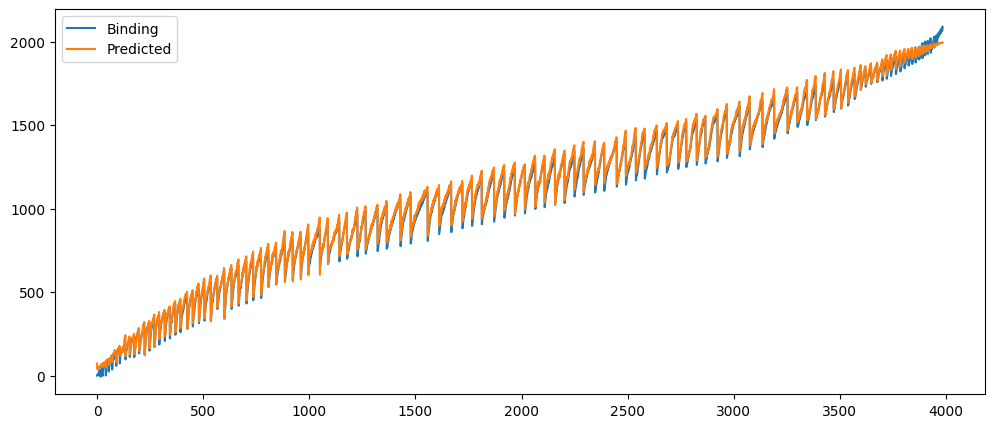

In [48]:
df_results.plot.line(figsize=(12,5))

In [50]:
# Save the neural network model
torch.save(mlp.state_dict(), 'mlp_28i100t30t5s1l.pth')

In [53]:
# Load dataset with unknown binding
df2_ = pd.read_csv('~/src/boldov/data2_evaluate.csv')
display(df2_)

,Z-XX-A-m,n,p,Svyazey,X,Y,Z,centrX,centrY,centrZ,...,n4,n5,n6,p1,p2,p3,p4,p5,p6,Binding
0,3-Li-13-p,10,3,15,5,5,5,5.461538,5.461538,2.076923,...,0,0,0,0,0,1,0,0,2,NaN
1,3-Li-14-p,11,3,16,5,6,5,5.428571,5.357143,2.142857,...,0,0,0,0,0,0,1,0,2,NaN
2,3-Li-15-p,12,3,17,6,6,5,5.333333,5.333333,2.200000,...,0,0,0,0,0,0,0,1,2,NaN
3,4-Be-17-p,13,4,21,7,8,6,5.411765,5.470588,2.294118,...,0,0,0,0,0,0,1,1,2,NaN
4,4-Be-18-p,14,4,22,8,8,6,5.500000,5.500000,2.333333,...,0,0,0,0,0,0,0,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,160-Uhn-394-p,234,160,914,310,310,294,5.500000,5.500000,5.720812,...,40,8,78,0,2,0,0,38,120,NaN
831,160-Uhn-395-p,235,160,915,310,310,295,5.506329,5.493671,5.713924,...,40,8,78,0,2,0,0,37,121,NaN
832,160-Uhn-396-p,236,160,916,310,310,296,5.500000,5.500000,5.707071,...,40,8,78,0,2,0,0,36,122,NaN
833,160-Uhn-397-p,237,160,917,310,310,297,5.491184,5.491184,5.702771,...,40,8,78,0,2,0,0,35,123,NaN


In [54]:
# Remove the first column with label
df2 = df2_.drop('Z-XX-A-m', axis=1)

# Apply initial scaler for all 28 input values
df2_mm_scaled = df2.copy()
df2_mm_scaled[df2.columns] = mm_scaler.transform(df2[df2.columns])

display(df2_mm_scaled)

,n,p,Svyazey,X,Y,Z,centrX,centrY,centrZ,Centrobeg,...,n4,n5,n6,p1,p2,p3,p4,p5,p6,Binding
0,0.056818,0.025424,0.022388,0.022523,0.022321,0.022321,0.461538,0.826303,0.112514,0.015768,...,0.000000,0.0,0.000000,0.0,0.0,0.05,0.000000,0.000000,0.023256,NaN
1,0.062500,0.025424,0.023881,0.022523,0.026786,0.022321,0.428571,0.705069,0.130597,0.017560,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.041667,0.000000,0.023256,NaN
2,0.068182,0.025424,0.025373,0.027027,0.026786,0.022321,0.333333,0.677419,0.146269,0.019305,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.027778,0.023256,NaN
3,0.073864,0.033898,0.031343,0.031532,0.035714,0.026786,0.411765,0.836812,0.172081,0.022551,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.041667,0.027778,0.023256,NaN
4,0.079545,0.033898,0.032836,0.036036,0.035714,0.026786,0.500000,0.870968,0.182836,0.024582,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.055556,0.023256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1.329545,1.355932,1.364179,1.396396,1.383929,1.312500,0.500000,0.870968,1.111865,1.538240,...,0.833333,0.8,1.444444,0.0,0.2,0.00,0.000000,1.055556,1.395349,NaN
831,1.335227,1.355932,1.365672,1.396396,1.383929,1.316964,0.506329,0.863618,1.109975,1.542640,...,0.833333,0.8,1.444444,0.0,0.2,0.00,0.000000,1.027778,1.406977,NaN
832,1.340909,1.355932,1.367164,1.396396,1.383929,1.321429,0.500000,0.870968,1.108096,1.547054,...,0.833333,0.8,1.444444,0.0,0.2,0.00,0.000000,1.000000,1.418605,NaN
833,1.346591,1.355932,1.368657,1.396396,1.383929,1.325893,0.491184,0.860730,1.106917,1.553217,...,0.833333,0.8,1.444444,0.0,0.2,0.00,0.000000,0.972222,1.430233,NaN


In [56]:
# Separate input and target output
X = df2_mm_scaled.drop('Binding', axis=1).values

In [57]:
# Calculate prediction on evaluation data
eval_data = torch.from_numpy(X).float()

with torch.no_grad():
    outputs = mlp(eval_data)
    predicted_y = outputs.squeeze().tolist()

predicted_y = np.array(predicted_y)

In [58]:
# Denormalize (scale back)  results: normalized = (x-min(x))/(max(x)-min(x))

# Apply initial scaler for all 28 input values
df2_mm_scaled['Binding'] = predicted_y
df2[df2.columns] = mm_scaler.inverse_transform(df2_mm_scaled[df2.columns])
display(df2)

,n,p,Svyazey,X,Y,Z,centrX,centrY,centrZ,Centrobeg,...,n4,n5,n6,p1,p2,p3,p4,p5,p6,Binding
0,10.0,3.0,15.0,5.0,5.0,5.0,5.461538,5.461538,2.076923,12.649651,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,70.250789
1,11.0,3.0,16.0,5.0,6.0,5.0,5.428571,5.357143,2.142857,14.086918,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,78.652588
2,12.0,3.0,17.0,6.0,6.0,5.0,5.333333,5.333333,2.200000,15.487261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,90.245450
3,13.0,4.0,21.0,7.0,8.0,6.0,5.411765,5.470588,2.294118,18.091292,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,92.039427
4,14.0,4.0,22.0,8.0,8.0,6.0,5.500000,5.500000,2.333333,19.720178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,86.828376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,234.0,160.0,914.0,310.0,310.0,294.0,5.500000,5.500000,5.720812,1234.030358,...,40.0,8.0,78.0,0.0,2.0,0.0,0.0,38.0,120.0,2009.943679
831,235.0,160.0,915.0,310.0,310.0,295.0,5.506329,5.493671,5.713924,1237.560406,...,40.0,8.0,78.0,0.0,2.0,0.0,0.0,37.0,121.0,2010.009294
832,236.0,160.0,916.0,310.0,310.0,296.0,5.500000,5.500000,5.707071,1241.101425,...,40.0,8.0,78.0,0.0,2.0,0.0,0.0,36.0,122.0,2010.069285
833,237.0,160.0,917.0,310.0,310.0,297.0,5.491184,5.491184,5.702771,1246.045475,...,40.0,8.0,78.0,0.0,2.0,0.0,0.0,35.0,123.0,2010.155522


In [59]:
# Prepare output data
df2_results = pd.DataFrame.from_dict({"Z-XX-A-m": df2_['Z-XX-A-m'],
                                     "PredictedBinding": df2['Binding']})
df2_results.to_csv('~/src/boldov/data2_results_.csv')

<AxesSubplot: >

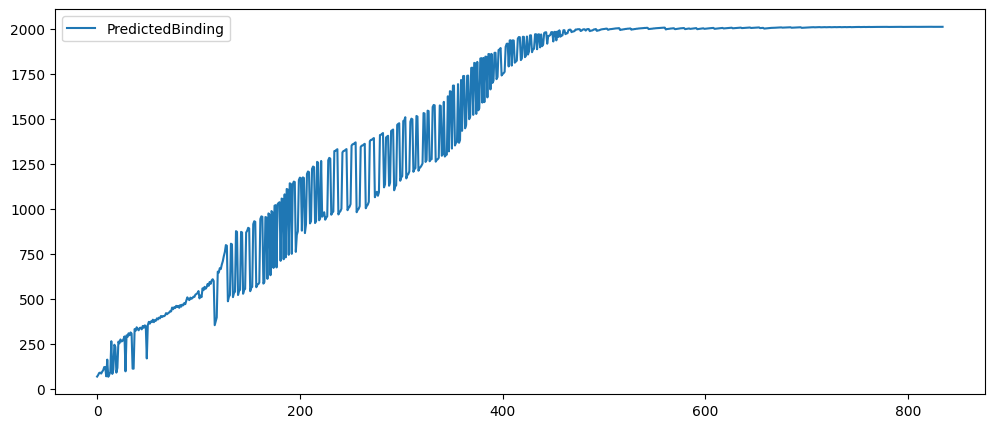

In [60]:
df2_results.plot.line(figsize=(12,5))